# AgroPad Analysis Demo

In [ ]:
#
# Copyright 2020- IBM Inc. All rights reserved
# SPDX-License-Identifier: BSD-3-Clause
#

## Overview/uPad Class

This jupyter notebook demonstrates how the ***uPad image processing library (uIPL)*** can be used to fully process and analyze an AgroPad card image. Although the code here presented consists of a python implementation instead of Java, the rationale is analogous to the analysis carried out by the mobile app and provides an example how the uIPL functions can be extended to analyze other generic uPad cards.

The necessary functions to analyze an AgroPad card are wrapped inside the **uPAD Class**.

To initialize an instance, two parameters are necessary:
1. **image**: As the name suggests, this consists of an image of an AgroPad card. This image can be of any form or card design, given that it includes the color reference image composed by the red, green, and blue color references, as well as a white space on the left for white estimation. 
2. **GlobalRef:** This includes the laboratory calibration's colorimetric matrix, generated during the calibration operation (see other notebook). This variable has the form of a **(n+1) x 6 Matrix**, where **n** is the number of reference spots in the card. Eg. For 4 reference spots (red, green, blue, and white spots), ***GlobRef*** will be:

~~~ py 
np.array(
  [Total_Mean_L, Total_Mean_a, Total_Mean_b, Total_Std_L, Total_Std_a, Total_Std_b],
  [R_Mean_r, R_Mean_g, R_Mean_b, R_Std_r, R_Std_g, R_Std_b],
  [G_Mean_r, G_Mean_g, G_Mean_b, G_Std_r, G_Std_g, G_Std_b],
  [B_Mean_r, B_Mean_g, B_Mean_b, B_Std_r, B_Std_g, B_Std_b],
  [W_Mean_r, W_Mean_g, W_Mean_b, W_Std_r, W_Std_g, W_Std_b]
  )
~~~

### Class Methods

- set_card_output(self, croplim): Defines the card output region as img[croplim[0]:croplim[1], croplim[2]:croplim[3]]
- set_card_ref(self, croplim, offset=[0,0]): Defines the card reference region as img[croplim[0]:croplim[1], croplim[2]:croplim[3]]
- load_ml_models(self, model_prefix): Loads logistic regression models with *model_prefix* name.
- correct_image(self, colorspace='RGB', reconstruction='linear', degree=3): Function to correct the card image for differences in illumination [2].
- analyze_card(self): Apply logistic regression models to AgroPad card.

### References

[1] *Jaione Tirapu-Azpiroz, Matheus Esteves Ferreira, Daniel Vitor Lopes Marcondes Marçal, Ademir Ferreira Silva, Ricardo Luis Ohta, Mathias B. Steiner, "High-resolution colorimetric detection on paper-based microfluidic devices via indicator merging and machine learning," Proc. SPIE 11637, Microfluidics, BioMEMS, and Medical Microsystems XIX, 116370D (5 March 2021); doi: 10.1117/12.2577303*

[2] *Matheus Esteves Ferreira, Jaione Tirapu-Azpiroz, Daniel Vitor Lopes Marcondes Marçal, Ademir Ferreira da Silva, Ricardo Luis Ohta, Mathias B. Steiner, "Illumination compensation algorithm for colorimetric detection of microfluidic paper-based devices with a smartphone," Proc. SPIE 11651, Optical Diagnostics and Sensing XXI: Toward Point-of-Care Diagnostics, 1165108 (5 March 2021); doi: 10.1117/12.2578441*

## Step-by-step Example

### Initializing uPad Instance

In [1]:
%matplotlib widget
%config InlineBackend.figure_format = 'retina'

In [2]:
from uIPL_2022_v2 import *

In [3]:
cd ~/Desktop/AgroPad External Code/Experimental Calibration Data/Illumination Reference

/Users/matheusferreira/Desktop/AgroPad External Code/Experimental Calibration Data/Illumination Reference


In [4]:
illum_ref = load_IllumCal('calibrationML-SOILSEP20.json', 'SOILSEP20')

In [5]:
cd ~/Desktop/AgroPad External Code/Sample Field Test Data

/Users/matheusferreira/Desktop/AgroPad External Code/Sample Field Test Data


In [6]:
card_image = plt.imread('Original_sample_H2_timestamp_1616003467_ID_5529.jpg')

Here we create an instance of the uPad class from an AgroPad image and an illumination reference loaded from the calibration json file.

In [7]:
uPad_Card = uPad(card_image, illum_ref)

### Setting Card/Reference Position

We then set the image area where the output and colorimetric reference are present using the *.set_card_output* and *.set_card_ref* (leaving a white space for the white spot to be cropped), respectively. 



In [8]:
%%capture
uPad_Card.set_card_output((600,1600,980,1980))
uPad_Card.set_card_ref((1975,2075,1750,2300))

*.image* can be called to show the loaded test image on the uPad instance

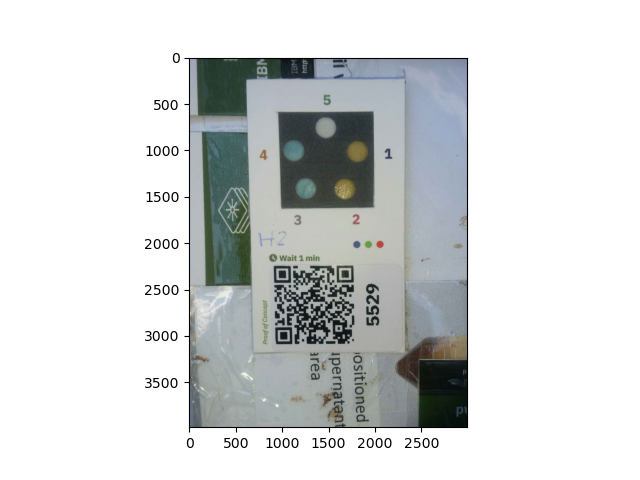

In [9]:
plt.figure()
plt.imshow(uPad_Card.image)
plt.show()

*.card_output_image_original* can be called to show the output region of the card before illumination correction.

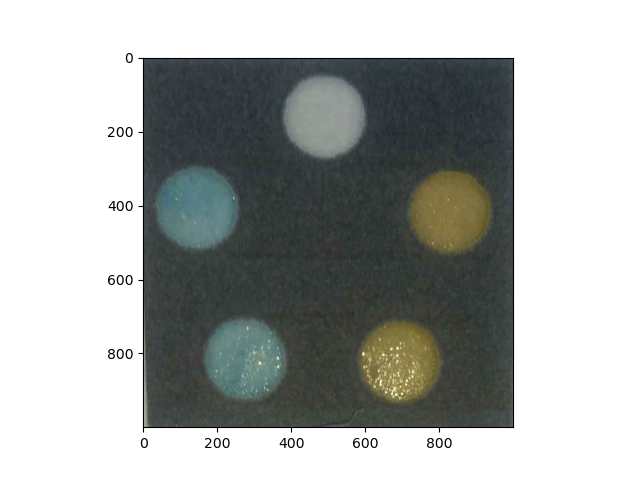

In [10]:
plt.figure()
plt.imshow(uPad_Card.card_output_image_original)
plt.show()

*.card_ref_image* can be called to show the reference region of the card before illumination correction.

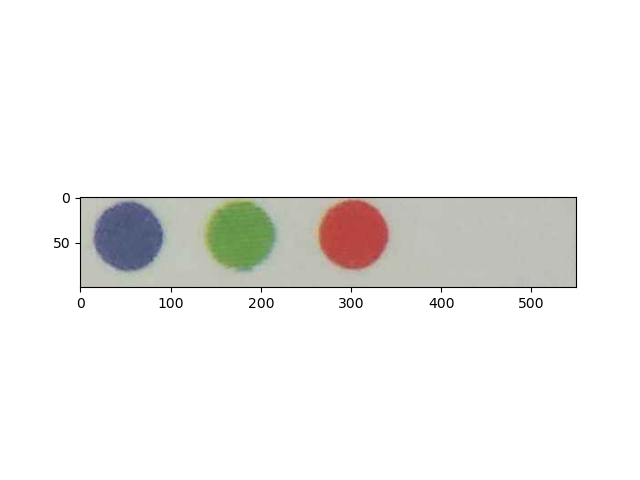

In [11]:
plt.figure()
plt.imshow(uPad_Card.card_ref_image)
plt.show()

### Illumination Correction

The *.correct_image()* class function can be called to correct the instance image using the loaded *illumination reference* as reference. More information about the method used for illumination correction can be found in [2]

In [12]:
%%capture
uPad_Card.correct_image()

*.correction_transform* can be called to return the calculated transformation matrix that approximates the test illumination conditions (as estimated from the *colorimetric reference*) to the one from the laboratory calibration dataset.

In [13]:
uPad_Card.correction_transform

array([[ 1.31989452, -0.32177035, -0.33461202],
       [-0.24827141,  1.08435866,  0.12775797],
       [-0.3134344 , -0.04475596,  0.93269442]])

*.corrected_image* can be called to return the corrected test image after illumination correction

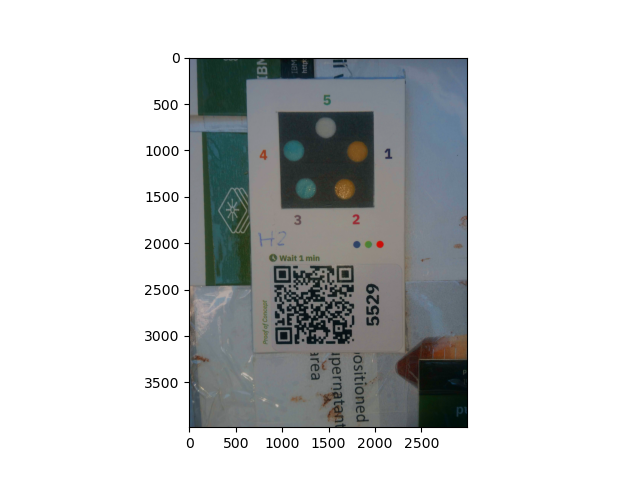

In [14]:
plt.figure()
plt.imshow(uPad_Card.corrected_image)
plt.show()

*.card_output_image_corrected* can be called to return the corrected output image after illumination correction

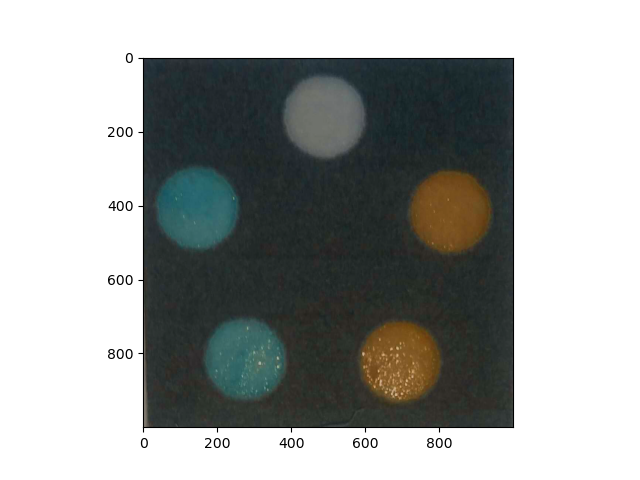

In [15]:
plt.figure()
plt.imshow(uPad_Card.card_output_image_corrected)
plt.show()

*uPad_Card.stats_original* can be called to return the average RGB and standard deviation results from each spot before illumination correction, with the rightmost spot being L0 and increasing clockwise.

In [16]:
uPad_Card.stats_original

{'L0': (array([126.51779345, 113.31152724,  63.83746757]),
  array([6.0820568 , 5.90077377, 4.96355167])),
 'L1': (array([145.36204316, 132.95406915,  79.70254482]),
  array([25.82840353, 26.15068258, 26.70584893])),
 'L2': (array([101.82157064, 133.46841564, 127.57544582]),
  array([14.22022149, 13.37676172, 12.16819994])),
 'L3': (array([ 90.28660723, 126.41425009, 128.47590259]),
  array([8.94729605, 7.4942247 , 7.24252868])),
 'L4': (array([143.11614749, 149.93653538, 145.5336812 ]),
  array([7.56042068, 7.29538273, 6.39224169]))}

*uPad_Card.stats_corrected* can be called to return the average RGB and standard deviation results from each spot after illumination correction

In [17]:
uPad_Card.stats_corrected

{'L0': (array([116.02507974,  77.41416821,  30.36562028]),
  array([7.5060767 , 5.36799192, 4.39430704])),
 'L1': (array([131.60659076,  91.94711362,  41.05903172]),
  array([19.95226638, 19.08609957, 19.669024  ])),
 'L2': (array([ 60.78735216, 105.76607703, 101.52049929]),
  array([12.14138291,  9.55194118,  8.67263005])),
 'L3': (array([ 46.75486083, 101.41050739, 104.978892  ]),
  array([8.80655446, 5.6188133 , 5.95716671])),
 'L4': (array([105.76023429, 109.71369453, 106.68822818]),
  array([6.2455538 , 5.10509955, 4.48710335]))}

### Loading Logistic Regression Models and Performing Card Analysis

In [18]:
cd ~/Desktop/AgroPad External Code/ML Models

/Users/matheusferreira/Desktop/AgroPad External Code/ML Models


*.load_ml_models()* can be used to load OpenCV Logistic Regression models saved as XML for classification of the colorimetric outputs.

In [19]:
uPad_Card.load_ml_models('SOILSEP20')

*.analyze_card()* can be called to use the loaded logistic regression models for analysis of the card.

In [20]:
uPad_Card.analyze_card()

*.analysis_results* can be called to return the classification results from the loaded logistic regression models

In [21]:
uPad_Card.analysis_results

{'L0': (0.0, array([[0]], dtype=int32)),
 'L1': (0.0, array([[0]], dtype=int32)),
 'L2': (1.0, array([[1]], dtype=int32)),
 'L3': (1.0, array([[1]], dtype=int32)),
 'L4': (0.0, array([[0]], dtype=int32))}